init jeu de donnees et affichage des informations, on notte une difference entre les colonnes Total_Proteins de chaque table

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# A compléter
df_h1 = pd.read_json('./liver.json')
df_h2 = pd.read_csv('./liver.csv')
df_h1.head()
df_h2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


avant de combiner les tables on fait l'harmonisation de la colonne Total_Proteins

In [4]:
def check_protein_format(protein_str):
    return isinstance(protein_str, str) and protein_str.strip().endswith('mg/dL')

def extract_protein_value(protein_str):
    if pd.isna(protein_str):
        return pd.NA
    if check_protein_format(protein_str):
        try:
            return float(protein_str.strip().replace('mg/dL','').strip())
        except:
            return pd.NA
    try:
        return float(protein_str/1000)
    except:
        return pd.NA

# Aplicar la función al dataframe (df_h2 ya debería existir)
df_h2['Total_Proteins'] = df_h2['Total_Proteins'].apply(extract_protein_value)
df_h2['Total_Proteins'].head()

0    7.8
1    7.1
2    7.7
3    8.3
4    8.0
Name: Total_Proteins, dtype: object

on fait l'harmonisation des unites de  Total_Bilirubin et Direct_Bilirubin

In [5]:
def harmonize_skin_thickness(df):
    df = df.copy()
    if 'Total_Bilirubin' in df.columns and 'Direct_Bilirubin' in df.columns:
        df['Total_Bilirubin'] = df['Total_Bilirubin'] / 10
        df['Direct_Bilirubin'] = df['Direct_Bilirubin'] / 10
    return df

df_h2 = harmonize_skin_thickness(df_h2)
df_h2[['Total_Bilirubin','Direct_Bilirubin']].head()

,Total_Bilirubin,Direct_Bilirubin
0,0.7,0.2
1,0.6,0.2
2,1.1,0.5
3,2.4,1.0
4,0.6,0.2


on rennome le colonnes Alamine_Aminotransferase, Aspartate_Aminotransferase, Outcome de la table df_h1

In [6]:
rename_map = {
    'Alamine_Aminotransferase':'ALT',
    'Aspartate_Aminotransferase':'AST',
    'Outcome':'Result',
    
}
df_h1 = df_h1.rename(columns=rename_map)
df_h1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


Concaténé les 2 jeux de données (à la fin)

In [7]:
df_combined = pd.concat([df_h1,df_h2])
df_combined

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
316,<20 yo,Male,1.4,0.5,269.0,58.0,45,6.7,3.9,1.40,1
317,61 to 80 yo,Male,0.7,0.1,196.0,20.0,35,5.8,2.0,0.50,1
318,61 to 80 yo,Male,2.8,1.3,250.0,NaN,29,2.7,0.9,0.50,1
319,41 to 60 yo,Male,0.9,0.3,901.0,23.0,17,6.2,3.5,1.20,1


Albumin_and_Globulin_Ratio = Albumin/(Total_protein -Albumin) alors on verifie la coherence 

In [8]:
def check_agr_consistency(df):
    df = df.copy()
    if 'Albumin' in df.columns and 'Total_protein' in df.columns and 'Albumin_and_Globulin_Ratio' in df.columns:
        agr_calc = df['Albumin'] / (df['Total_protein']-df['Albumin'])
        
        if df['Albumin_and_Globulin_Ratio'].isna():
            df['Albumin_and_Globulin_Ratio'] = agr_calc
            
        diff = (df['Albumin_and_Globulin_Ratio'] - agr_calc).abs()
        return diff == 0
    else:
        import pandas as pd
        return pd.Series([False]*len(df), index=df.index)


consistency = check_agr_consistency(df_combined)
consistency.value_counts()

False    612
Name: count, dtype: int64

retirer les doublons

In [9]:

print("Nombre de doublons :", df_combined.duplicated().sum())

print(df_combined[df_combined.duplicated()])

df_combined = df_combined.drop_duplicates()

print("Nombre de lignes après nettoyage :", len(df_combined))




Nombre de doublons : 23
             Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
19   21 to 40 yo  Female              0.9               0.3   
34   21 to 40 yo  Female              2.6               1.2   
55   41 to 60 yo    Male              8.9               4.5   
106  21 to 40 yo    Male              5.3               2.3   
143  21 to 40 yo    Male              1.6               0.4   
293  61 to 80 yo  Female              2.9               1.3   
294  61 to 80 yo    Male              0.8               0.1   
295       <20 yo    Male              0.8               0.2   
296  61 to 80 yo    Male             10.9               5.5   
297  41 to 60 yo    Male              0.8               0.2   
299  21 to 40 yo    Male              1.8               0.8   
300  61 to 80 yo    Male              7.3               4.1   
301  21 to 40 yo    Male              0.9               0.2   
302  41 to 60 yo    Male              0.9               0.2   
303       <20 yo  Female       

apres revison on decide d'effacer les colonnes Albumin et Total_proteins 

In [10]:
df_combined = df_combined.drop(columns=['Albumin', 'Total_Proteins'], errors='ignore')
df_combined.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,0.40,1


init de la table et les libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

df = df_combined
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,0.40,1
...,...,...,...,...,...,...,...,...,...
310,<20 yo,Male,0.7,0.1,312.0,308.0,405,1.10,1
311,41 to 60 yo,Male,0.6,0.2,290.0,26.0,21,1.00,1
317,61 to 80 yo,Male,0.7,0.1,196.0,20.0,35,0.50,1
319,41 to 60 yo,Male,0.9,0.3,901.0,23.0,17,1.20,1


Convertir la variable catégorielle Age en variable numérique à l'aide de `LabelEncoding`

In [12]:
le = LabelEncoder()
df_label_encoded = df.copy()
df_label_encoded['Age'] = le.fit_transform(df_label_encoded['Age'])
df=df_label_encoded
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result
0,2,Female,0.7,0.1,187.0,NaN,18,0.90,1
1,2,Male,10.9,5.5,699.0,64.0,100,0.74,1
2,2,Male,7.3,4.1,490.0,NaN,68,NaN,1
3,1,Male,1.0,0.4,182.0,14.0,20,1.00,1
4,2,Male,3.9,2.0,195.0,27.0,59,0.40,1
...,...,...,...,...,...,...,...,...,...
310,3,Male,0.7,0.1,312.0,308.0,405,1.10,1
311,1,Male,0.6,0.2,290.0,26.0,21,1.00,1
317,2,Male,0.7,0.1,196.0,20.0,35,0.50,1
319,1,Male,0.9,0.3,901.0,23.0,17,1.20,1


Et la variable catégorielle Gender en variable numérique à l'aide de `OneHotEncoding`

In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=False)
df = df_encoded
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2,0.7,0.1,187.0,NaN,18,0.90,1,True,False
1,2,10.9,5.5,699.0,64.0,100,0.74,1,False,True
2,2,7.3,4.1,490.0,NaN,68,NaN,1,False,True
3,1,1.0,0.4,182.0,14.0,20,1.00,1,False,True
4,2,3.9,2.0,195.0,27.0,59,0.40,1,False,True
...,...,...,...,...,...,...,...,...,...,...
310,3,0.7,0.1,312.0,308.0,405,1.10,1,False,True
311,1,0.6,0.2,290.0,26.0,21,1.00,1,False,True
317,2,0.7,0.1,196.0,20.0,35,0.50,1,False,True
319,1,0.9,0.3,901.0,23.0,17,1.20,1,False,True


Distribution de age et gender

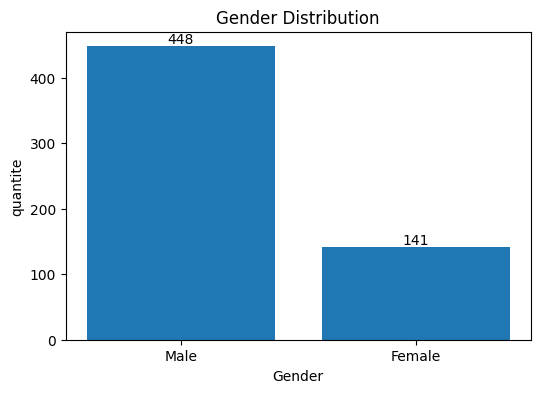

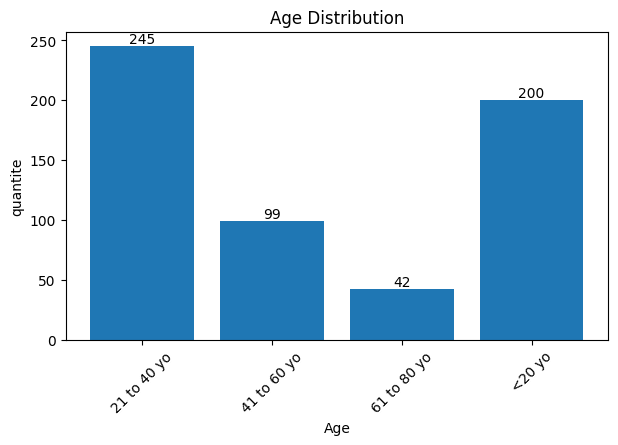

In [14]:


gender_series = df.apply(
    lambda row: "Female" if row["Gender_Female"] else "Male",
    axis=1
)

age_mapping = {
    0: "<20 yo",
    1: "21 to 40 yo",
    2: "41 to 60 yo",
    3: "61 to 80 yo"
}
age_group_series = df["Age"].map(age_mapping)

gender_counts = gender_series.value_counts()

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values)
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("quantite")
plt.show()

age_counts = age_group_series.value_counts().sort_index()

plt.figure(figsize=(7,4))
plt.bar(age_counts.index, age_counts.values)
for i, v in enumerate(age_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("quantite")
plt.xticks(rotation=45)
plt.show()


Gestion de valeurs manquantes

In [15]:
# Afficher un aperçu des valeurs manquantes 
df_encoded.isna().sum()

na_columns = df_encoded.columns[df_encoded.isna().any()].tolist()
na_columns

['Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'ALT',
 'Albumin_and_Globulin_Ratio']

In [16]:
cols_a_interpoler = [
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'ALT',
    'Albumin_and_Globulin_Ratio'
]

df[cols_a_interpoler] = df[cols_a_interpoler].interpolate(
    method='linear',
    limit_direction='both'
)

df


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2,0.7,0.1,187.0,64.0,18,0.90,1,True,False
1,2,10.9,5.5,699.0,64.0,100,0.74,1,False,True
2,2,7.3,4.1,490.0,39.0,68,0.87,1,False,True
3,1,1.0,0.4,182.0,14.0,20,1.00,1,False,True
4,2,3.9,2.0,195.0,27.0,59,0.40,1,False,True
...,...,...,...,...,...,...,...,...,...,...
310,3,0.7,0.1,312.0,308.0,405,1.10,1,False,True
311,1,0.6,0.2,290.0,26.0,21,1.00,1,False,True
317,2,0.7,0.1,196.0,20.0,35,0.50,1,False,True
319,1,0.9,0.3,901.0,23.0,17,1.20,1,False,True


affichage de distribution de Target Resultat

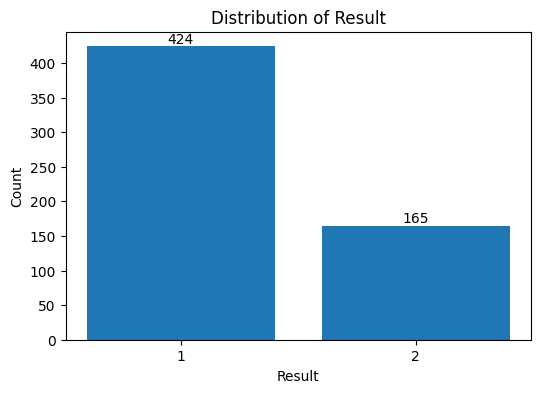

In [17]:
result_counts = df["Result"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(result_counts.index.astype(str), result_counts.values)

for i, v in enumerate(result_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title("Distribution of Result")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


Notre Target `Resultat` présente un déséquilibre susceptible d'affecter notre modèle d'apprentissage. Compte tenu de la taille de Données, nous allons le rééquilibrer à l'aide de SMOTE. Cependant, avant cela, nous isolons 20 % de l'ensemble de données pour les tests et appliquons SMOTE uniquement à la partie entraînement afin d'éviter `data leakage`.

In [19]:


X = df.drop(columns=["Result"])
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Avant SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("\nApres SMOTE:")
print(y_train_resampled.value_counts())


Avant SMOTE:
Result
1    339
2    132
Name: count, dtype: int64

Apres SMOTE:
Result
1    339
2    339
Name: count, dtype: int64


Puisqu'il existe des valeurs aberrantes, on a décidé de ne pas supprimer les valeurs aberrantes, car dans les données cliniques, les valeurs extrêmes peuvent refléter des situations médicales réelles et importantes. Les éliminer ferait perdre une information utile.
On a donc choisi d’utiliser la méthode IQR, une approche robuste qui ne suppose pas une distribution normale et qui permet de corriger les valeurs extrêmes sans altérer l’essentiel des données.


In [20]:

numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)

df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2.0,0.7,0.10,187.0,64.0,18,0.90,1,True,False
1,2.0,5.3,2.95,482.5,64.0,100,0.74,1,False,True
2,2.0,5.3,2.95,482.5,39.0,68,0.87,1,False,True
3,1.0,1.0,0.40,182.0,14.0,20,1.00,1,False,True
4,2.0,3.9,2.00,195.0,27.0,59,0.40,1,False,True
...,...,...,...,...,...,...,...,...,...,...
310,2.5,0.7,0.10,312.0,119.0,180,1.10,1,False,True
311,1.0,0.6,0.20,290.0,26.0,21,1.00,1,False,True
317,2.0,0.7,0.10,196.0,20.0,35,0.50,1,False,True
319,1.0,0.9,0.30,482.5,23.0,17,1.20,1,False,True


pour la normalisation, on a choisi d’appliquer une standardisation (StandardScaler) afin d’harmoniser les échelles des variables cliniques, qui présentent des amplitudes très différentes. Cette méthode transforme chaque variable pour qu’elle ait une moyenne de 0 et un écart-type de 1, ce qui permet au modèle d’apprendre plus efficacement sans que certaines valeurs dominent les autres

In [21]:
numeric_cols = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Alkaline_Phosphotase', 'ALT', 'AST',
    'Albumin_and_Globulin_Ratio'
]

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,1.285145,-0.734473,-0.780102,-0.586215,0.443262,-0.870598,-0.115029,1,True,False
1,1.285145,2.054373,2.090075,2.095973,0.443262,0.656759,-0.662799,1,False,True
2,1.285145,2.054373,2.090075,2.095973,-0.298868,0.060717,-0.217736,1,False,True
3,0.069160,-0.552592,-0.477978,-0.631599,-1.040999,-0.833345,0.227327,1,False,True
4,1.285145,1.205594,1.133349,-0.513601,-0.655091,-0.106919,-1.826809,1,False,True
...,...,...,...,...,...,...,...,...,...,...
310,1.893138,-0.734473,-0.780102,0.548382,2.075950,2.146862,0.569683,1,False,True
311,0.069160,-0.795100,-0.679394,0.348693,-0.684776,-0.814719,0.227327,1,False,True
317,1.285145,-0.734473,-0.780102,-0.504524,-0.862888,-0.553950,-1.484453,1,False,True
319,0.069160,-0.613219,-0.578686,2.095973,-0.773832,-0.889224,0.912039,1,False,True


Pour mieux comprendre les relations entre les variables, il est essentiel d'analyser la matrice de corrélation

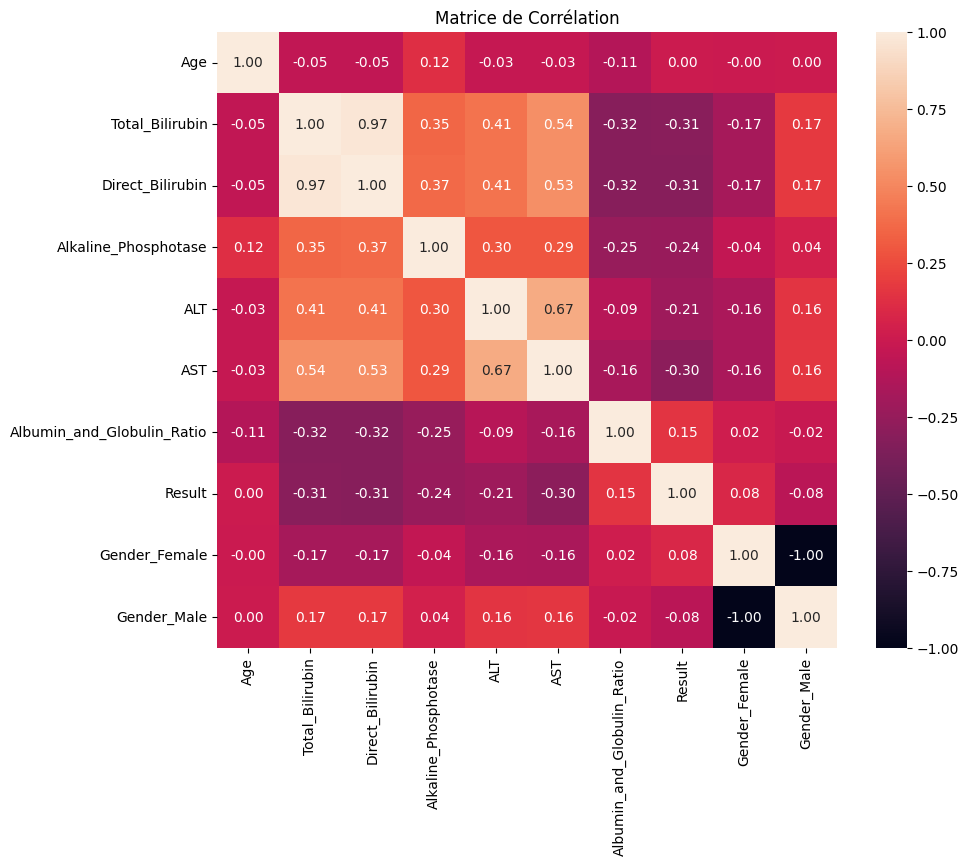

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


Nous allons utiliser la matrice de corrélation pour analyser les relations entre les variables et sélectionner les plus pertinentes pour notre analyse,on va trier par ordre décroissantet Sélectionner uniquement les variables dont la valeur absolue de corrélation est supérieure à 0,2, on obtient un DataFrame contenant uniquement les colonnes (les plus pertinentes pour le target)

In [24]:
def select_features(df):
    corr_target = correlation_matrix['Result'].abs().sort_values(ascending=False)
    selected_features = corr_target[corr_target > 0.2].index.tolist()
    print(selected_features)
    return df[selected_features]

df_selected = select_features(df)
df_selected.head()

['Result', 'Direct_Bilirubin', 'Total_Bilirubin', 'AST', 'Alkaline_Phosphotase', 'ALT']


,Result,Direct_Bilirubin,Total_Bilirubin,AST,Alkaline_Phosphotase,ALT
0,1,-0.780102,-0.734473,-0.870598,-0.586215,0.443262
1,1,2.090075,2.054373,0.656759,2.095973,0.443262
2,1,2.090075,2.054373,0.060717,2.095973,-0.298868
3,1,-0.477978,-0.552592,-0.833345,-0.631599,-1.040999
4,1,1.133349,1.205594,-0.106919,-0.513601,-0.655091


pour finaliser on garde notre df

In [25]:
df_selected.to_csv("df_Final.csv", index=False)